In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D, Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
df= pd.read_csv("ECGdataset(Ass4)/ecg_autoencoder_dataset.csv" ,header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0


In [78]:
x=df.drop([140],axis=1)
y=df[140]

In [79]:
print(x.shape)
print(y)

(4998, 140)
0       1
1       1
2       1
3       1
4       1
       ..
4993    0
4994    0
4995    0
4996    0
4997    0
Name: 140, Length: 4998, dtype: int64


In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=142)

In [83]:
#x_train=x_train.reshape(-1,1)
#x_test=np.reshape(x_test,(-1,1))
scaler= StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [84]:
encoder=Sequential()
encoder.add(Dense(64 , input_shape =( x_train.shape[1],),activation='relu'))


In [85]:
decoder = Sequential()
decoder.add(Dense(x_train.shape[1],activation='sigmoid'))

In [86]:
autoencoder = Sequential([encoder,decoder])

In [87]:
autoencoder.compile(optimizer='adam',loss='mean_squared_error', metrics=['accuracy'])

In [90]:
history=autoencoder.fit(x_train,x_train,epochs=50)

Epoch 1/50
110/110 [==============================] - 0s 826us/step - loss: 0.6165 - accuracy: 0.3879
Epoch 2/50
110/110 [==============================] - 0s 851us/step - loss: 0.6165 - accuracy: 0.3902
Epoch 3/50
110/110 [==============================] - 0s 849us/step - loss: 0.6165 - accuracy: 0.3856
Epoch 4/50
110/110 [==============================] - 0s 860us/step - loss: 0.6165 - accuracy: 0.3905
Epoch 5/50
110/110 [==============================] - 0s 798us/step - loss: 0.6165 - accuracy: 0.3854
Epoch 6/50
110/110 [==============================] - 0s 858us/step - loss: 0.6165 - accuracy: 0.3939
Epoch 7/50
110/110 [==============================] - 0s 803us/step - loss: 0.6164 - accuracy: 0.3902
Epoch 8/50
110/110 [==============================] - 0s 784us/step - loss: 0.6164 - accuracy: 0.3919
Epoch 9/50
110/110 [==============================] - 0s 833us/step - loss: 0.6164 - accuracy: 0.3982
Epoch 10/50
110/110 [==============================] - 0s 832us/step - loss: 0.616

In [91]:
loss,accuracy= autoencoder.evaluate(x_test,x_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

47/47 [==============================] - 0s 784us/step - loss: 0.6499 - accuracy: 0.3753
Test Loss: 0.6498959064483643
Test Accuracy: 0.37533333897590637


In [92]:
decoded_data = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - decoded_data, 2), axis = 1)
threshold = np.percentile(mse, 95)

outliers = mse> threshold
print("Confusion Matrix:\n", confusion_matrix(y_test, outliers))
print("Classification report:\n", classification_report(y_test, outliers))

47/47 [==============================] - 0s 640us/step
Confusion Matrix:
 [[580  49]
 [845  26]]
Classification report:
               precision    recall  f1-score   support

           0       0.41      0.92      0.56       629
           1       0.35      0.03      0.05       871

    accuracy                           0.40      1500
   macro avg       0.38      0.48      0.31      1500
weighted avg       0.37      0.40      0.27      1500



In [93]:
num_outliers = np.sum(outliers)
num_anomalies = np.sum(y_test[outliers]==1)

In [94]:
print(f'Number of outliers: {num_outliers}')
print(f'Number of anomalies: {num_anomalies}')

Number of outliers: 75
Number of anomalies: 26


KeyError: 'val_loss'

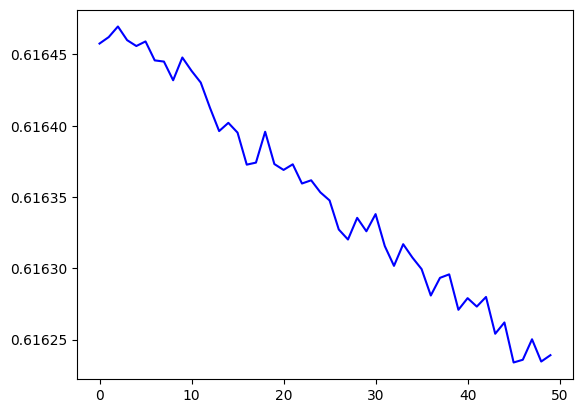

In [96]:
plt.plot(history.history['loss'], label = 'loss', color = 'blue')
plt.plot(history.history['val_loss'], label = 'val_loss', color = 'green')
plt.legend
plt.xlabel('epoch')
plt.ylabel('loss')

KeyError: 'val_accuracy'

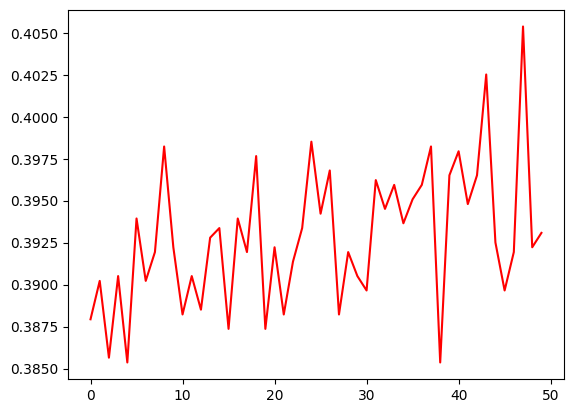

In [97]:
plt.plot(history.history['accuracy'], label = 'acc', color = 'red')
plt.plot(history.history['val_accuracy'], label = 'val_acc', color = 'green')
plt.legend